In [1]:
import os
import sys
import numpy as np

import umap.umap_ as umap

%load_ext autoreload
%autoreload 2

#add the parent folder to sys path so we can import from the notebook subfolder
sys.path.insert(0,'..')


BASEDIR = ""
TIFDIR = "/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/nf_demo_full"
#TIFDIR = "/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2"
EXT='.tiff'

image_directory = os.path.join(BASEDIR, TIFDIR)
output_directory = os.path.join(image_directory, "outputs")

if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
#image_directory = ALLDIR

import xfmreadout.processops as processops
import xfmreadout.clustering as clustering
import xfmreadout.visualisations as vis

FORCE_EMBED=True
FORCE_CLUST=True
OVERWRITE=True

elements, data, dims, sd, sd_dims = processops.compile(image_directory)

#data, dims = processops.data_crop(data, dims, 100, 500, 150, 350)
data, dims = processops.data_crop(data, dims, 1500, 2000, 890, 1090)
sd, sd_dims = processops.data_crop(sd, sd_dims, 1500, 2000, 890, 1090)

weights = np.ones(data.shape[1], dtype=np.float32)
weights = processops.calc_weights(data, weights, do_sqrt=False)

-----------------
BEGIN reading processed data
Location: /home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/nf_demo_full
-----
Map files found: 20
Elements identified: ['Al', 'As', 'Ca', 'Cl', 'Compton', 'Cr', 'Cu', 'Fe', 'K', 'Mn', 'Mo', 'MoL', 'Ni', 'P', 'S', 'Si', 'Ti', 'V', 'Zn', 'sum']
-----------------
READING MAP DATA
Initial shape: (1166, 2048, 20)
Revised shape: (1092, 2048, 20)
-----
-----------------
READING VARIANCE DATA
Initial shape: (583, 1024, 20)
Revised shape: (546, 1024, 20)
-----
(559104, 20)
data0 (2236416,)
datafull (2236416, 20)
Al -- dataq99: 7.223, sdq2: 3.934, max: 7.816
Gaussian averaging, cycle 0 -- dataq99: 7.223, sdq2: 3.934, ratio: 3.672
(2236416,)
Gaussian averaging, cycle 1 -- dataq99: 3.230, sdq2: 1.329, ratio: 4.861
(2236416,)
Gaussian averaging, cycle 2 -- dataq99: 1.445, sdq2: 1.152, ratio: 2.509
(2236416,)
Gaussian averaging, cycle 3 -- dataq99: 0.646, sdq2: 1.092, ratio: 1.184
(2236416,)
As -- dataq99: 0.040, sdq2: 0.096, max: 1.498
Ca -- dataq

(100000, 1, 20)
ELEMENT MAP: Mg
(None), Mg, max: 62.07, 98: 9.35, avg: 0.76


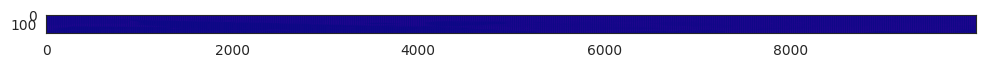

(100000, 1, 20)
ELEMENT MAP: Mg
(None), Mg, max: 8.64, 98: 4.29, avg: 0.54


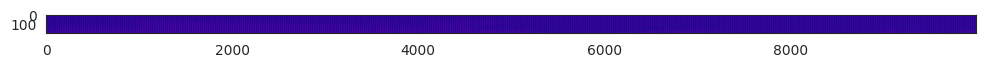

In [11]:
import xfmreadout.utils as utils
import matplotlib.pyplot as plt

ELEMENT = "Mg"

vis.show_map(data, dims, elements, ELEMENT)

vis.show_map(sd, sd_dims, elements, ELEMENT)



CALCULATING EMBED
running reducer: UMAP across data with shape: (100000, 20)
UMAP(n_components=3, n_neighbors=30, verbose=True)
Mon Jul 10 22:48:27 2023 Construct fuzzy simplicial set
Mon Jul 10 22:48:27 2023 Finding Nearest Neighbors
Mon Jul 10 22:48:27 2023 Building RP forest with 21 trees
Mon Jul 10 22:48:27 2023 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Mon Jul 10 22:48:33 2023 Finished Nearest Neighbor Search
Mon Jul 10 22:48:33 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Mon Jul 10 22:49:12 2023 Finished embedding
CALCULATING CATS
RUNNING CLASSIFIER
---------------------------
CLASSIFICATION COMPLETE
---------------------------
total time: 50.34 s
time per pixel: 0.000503 s
---------------------------
cluster 0, count: 26043
cluster 1, count: 3348
cluster 2, count: 3812
cluster 3, count: 8331
cluster 4, count: 13890
cluster 5, count: 9894
cluster 6, count: 9668
cluster 7, count: 14010
cluster 8, count: 11004
(100000, 3)
running reducer: PCA across data with shape: (100000, 3)
[[ 1.1936808e+00  6.3329120e+00  6.3432317e+00]
 [-4.1507152e-01  9.0371752e+00  1.0092905e-02]
 [-1.1761038e-02  1.0426597e+01  1.1484729e+00]
 [ 8.8299942e+00  6.2834072e+00  6.0458398e+00]
 [ 1.2255990e+01  6.7031307e+00  7.8081455e+00]
 [ 7.1908814e-01 -3.7643462e-01  5.4691544e+00]
 [-1.0101603e+00 -1.0979791e+00  7.5279522e+00]
 [-4.3131435e-01  1.1783809e+01  9.2638502e+00]
 [-3.8021842e-01  1.0169334e+01  1.1568780e+01]]
[[0.5        0.5        0.5       ]
 [0.04485769 0.7

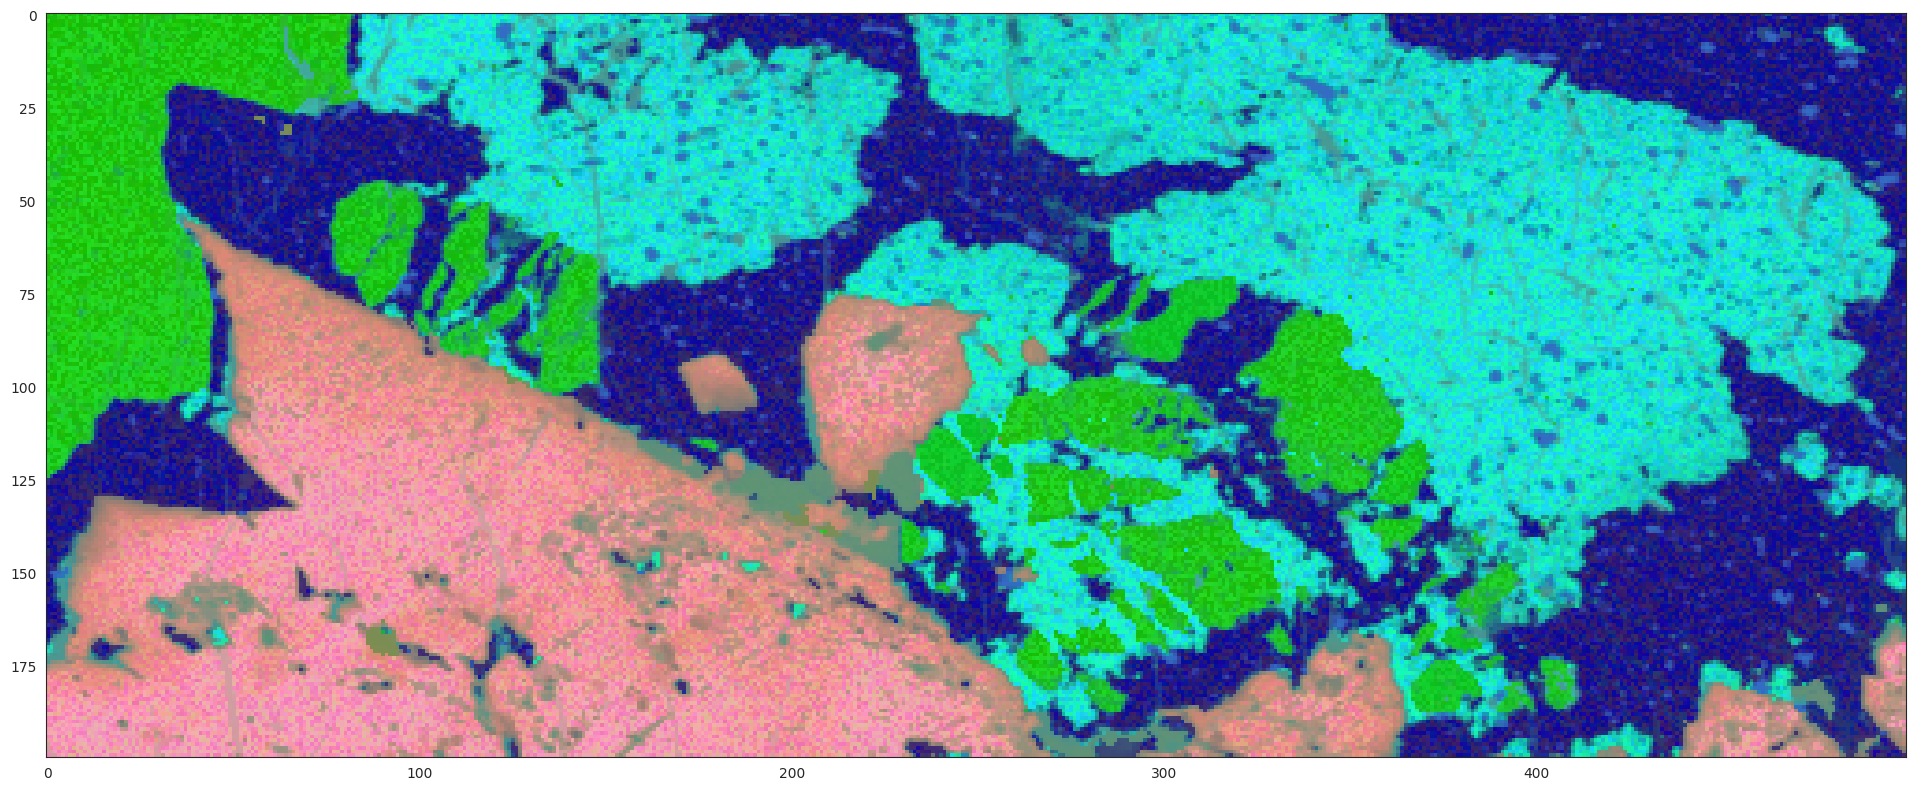

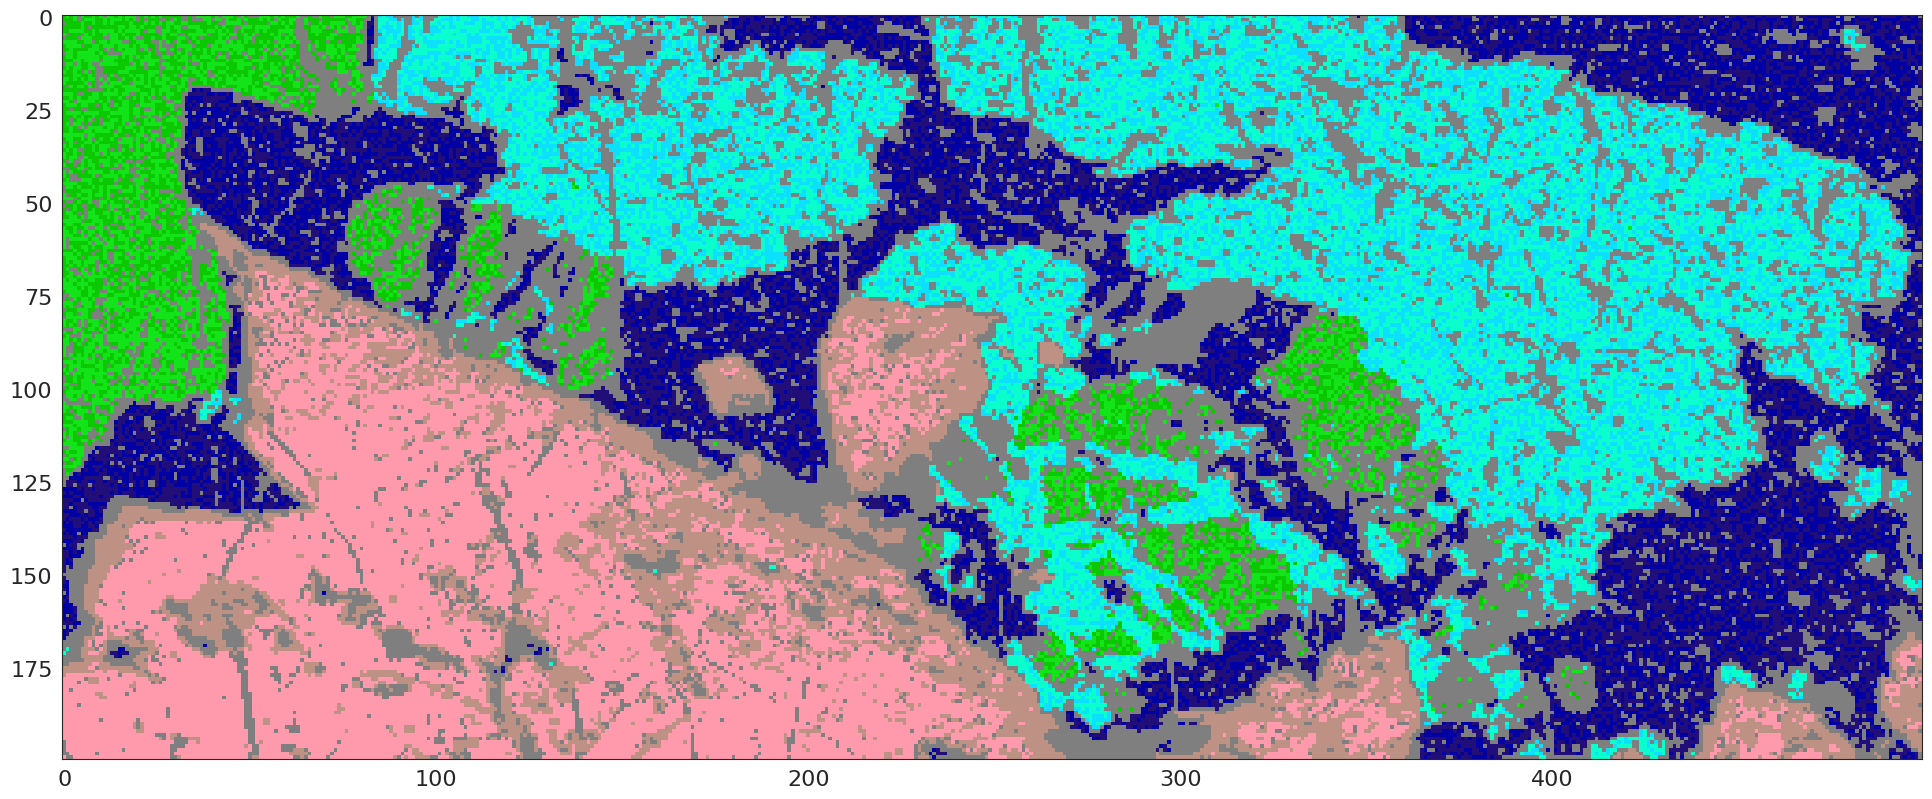

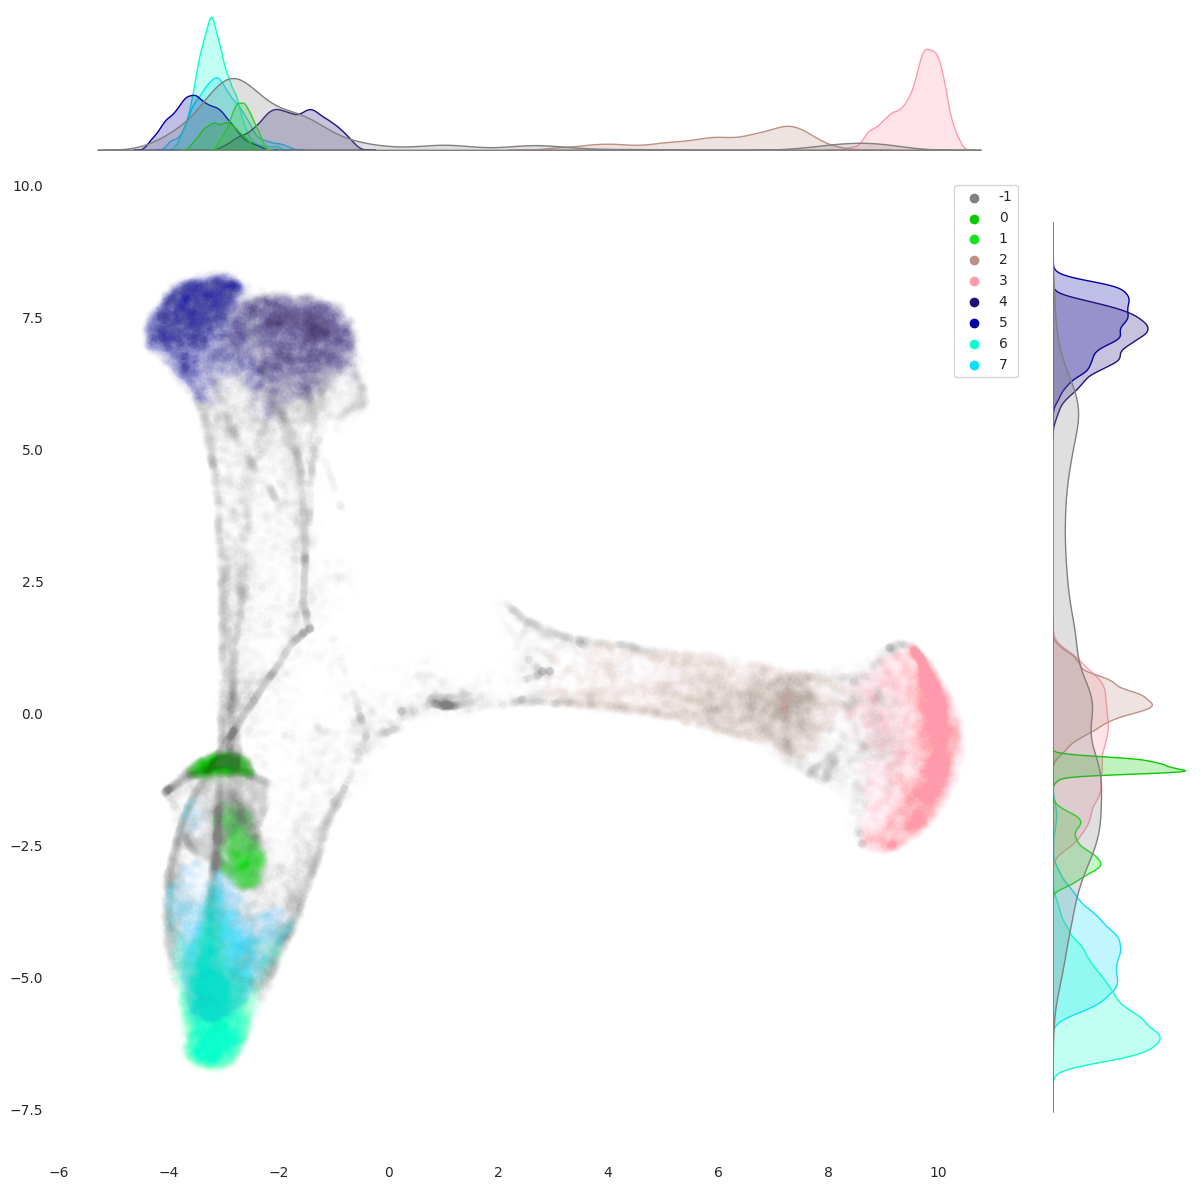

Al, max: 1.00, 98: 0.63, avg: 0.35
As, max: 0.72, 98: 0.01, avg: 0.00
Ca, max: 4.39, 98: 0.70, avg: 0.06
Cl, max: 0.05, 98: 0.04, avg: 0.02
Compton, max: 0.00, 98: 0.00, avg: 0.00
Cr, max: 0.04, 98: 0.03, avg: 0.01
Cu, max: 12.10, 98: 8.21, avg: 1.99
Fe, max: 18.14, 98: 13.61, avg: 7.77
K, max: 0.27, 98: 0.03, avg: 0.00
Mn, max: 10.03, 98: 0.22, avg: 0.03
Mo, max: 15.18, 98: 3.99, avg: 2.29
MoL, max: 0.78, 98: 0.50, avg: 0.22
Ni, max: 0.25, 98: 0.04, avg: 0.01
P, max: 0.06, 98: 0.04, avg: 0.02
S, max: 4.32, 98: 3.30, avg: 1.73
Si, max: 4.49, 98: 2.63, avg: 0.55
Ti, max: 2.78, 98: 0.03, avg: 0.01
V, max: 0.02, 98: 0.01, avg: 0.01
Zn, max: 62.07, 98: 1.81, avg: 0.21
sum, max: 0.00, 98: 0.00, avg: 0.00
CPU times: user 5min 5s, sys: 29.6 s, total: 5min 35s
Wall time: 55.6 s


In [8]:
%%time


FORCE_EMBED=True
FORCE_CLUST=True
OVERWRITE=True

weights = np.ones(data.shape[1], dtype=np.float32)
weights = processops.calc_weights(data, weights, do_sqrt=False) #weights unchanged
data_ = processops.apply_weights(data, weights)
data_ = np.sqrt(data_)


categories, embedding = clustering.run(data_, image_directory, force_embed=FORCE_EMBED, force_clust=FORCE_CLUST, overwrite=OVERWRITE)

classavg = clustering.get_classavg(data, categories, image_directory, force=FORCE_CLUST, overwrite=OVERWRITE)

palette = vis.plot_clusters(categories, classavg, embedding, dims, output_directory=output_directory)

for i in range(len(elements)):
    print(f"{elements[i]}, max: {np.max(data[:,i]):.2f}, 98: {np.quantile(data[:,i],0.98):.2f}, avg: {np.average(data[:,i]):.2f}")




cluster 0, count: 27738
cluster 1, count: 24637
cluster 2, count: 25843
cluster 3, count: 13861
cluster 4, count: 4060
cluster 5, count: 3861
(100000, 3)
running reducer: PCA across data with shape: (100000, 3)
[[-0.44090593 -0.12805693  8.813717  ]
 [11.246175    2.7375042   7.3202977 ]
 [ 1.6232108  10.933365    7.9323874 ]
 [ 1.6113857   2.9754705  -0.66913414]
 [-1.1147208  -0.98999035  6.6047654 ]
 [-0.73333836 -1.0293787  12.383689  ]]
[[0.5        0.5        0.5       ]
 [1.         0.3148845  0.61208457]
 [0.22149947 1.         0.65897787]
 [0.22054282 0.33477682 0.        ]
 [0.         0.00329258 0.5572664 ]
 [0.03085395 0.         1.        ]]
6
(100000,)
-1
0


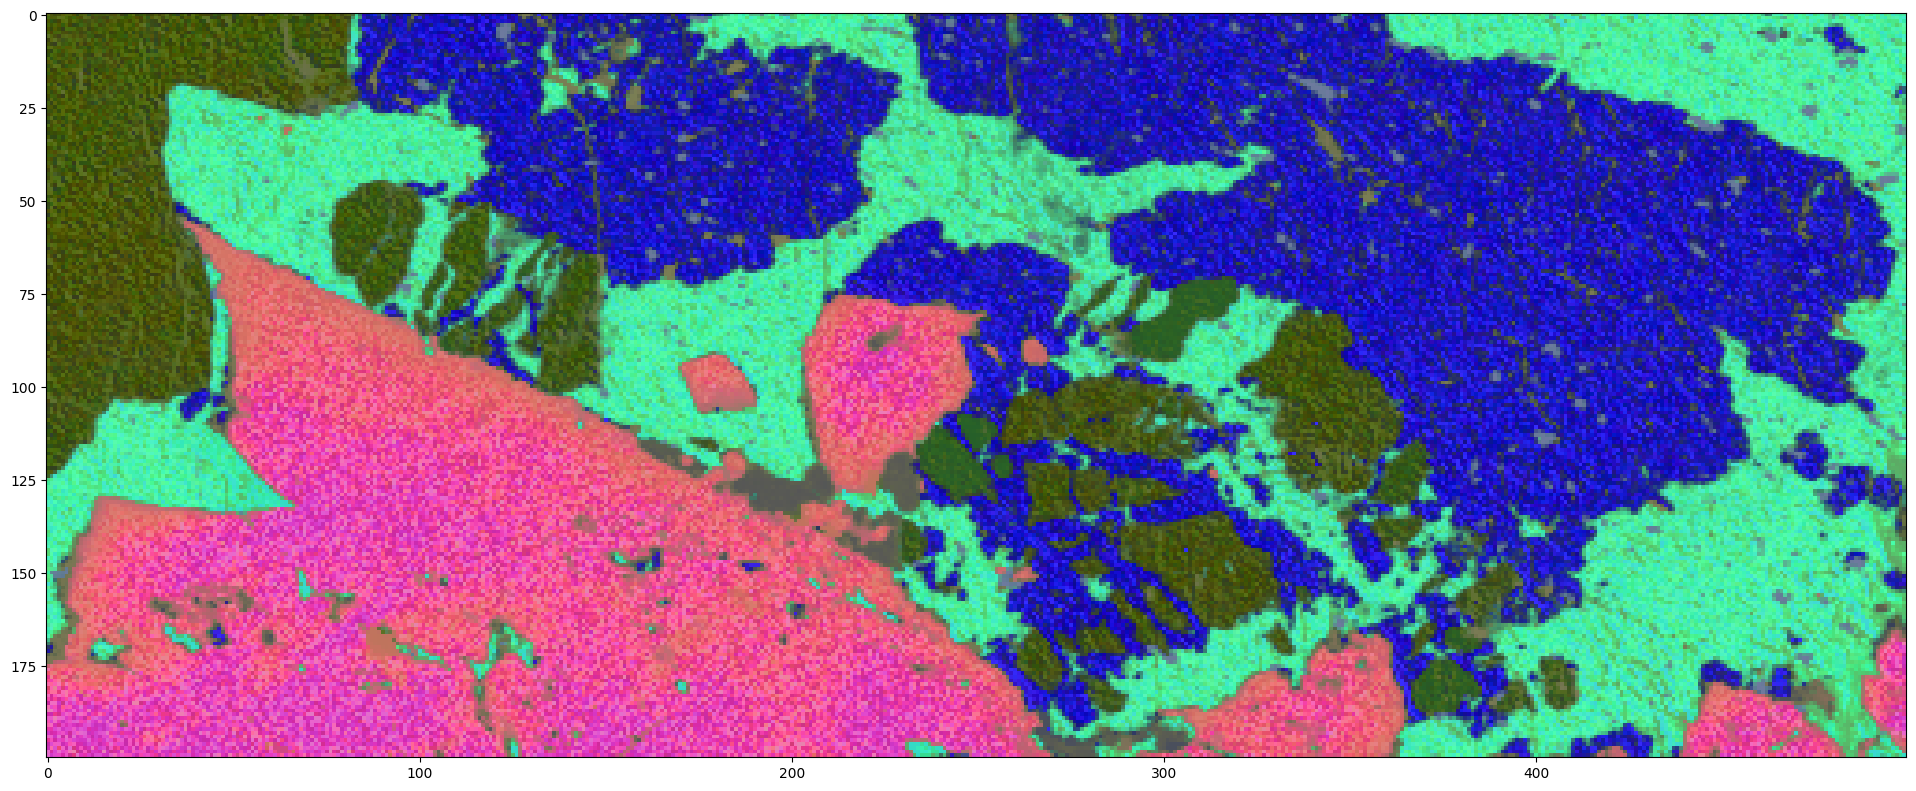

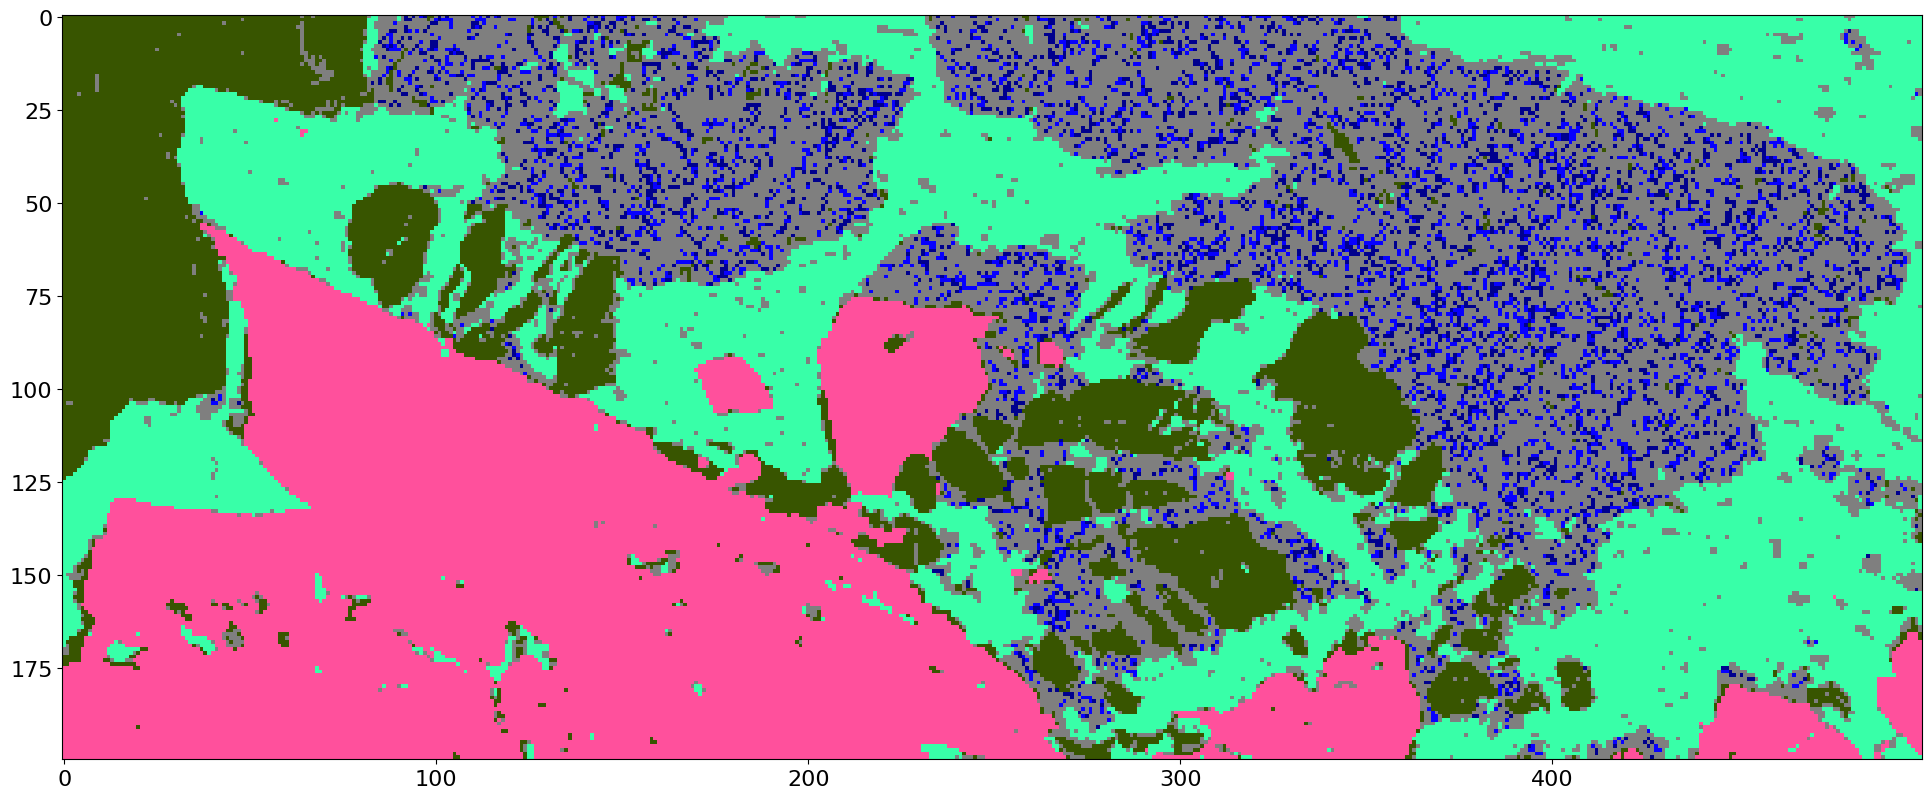

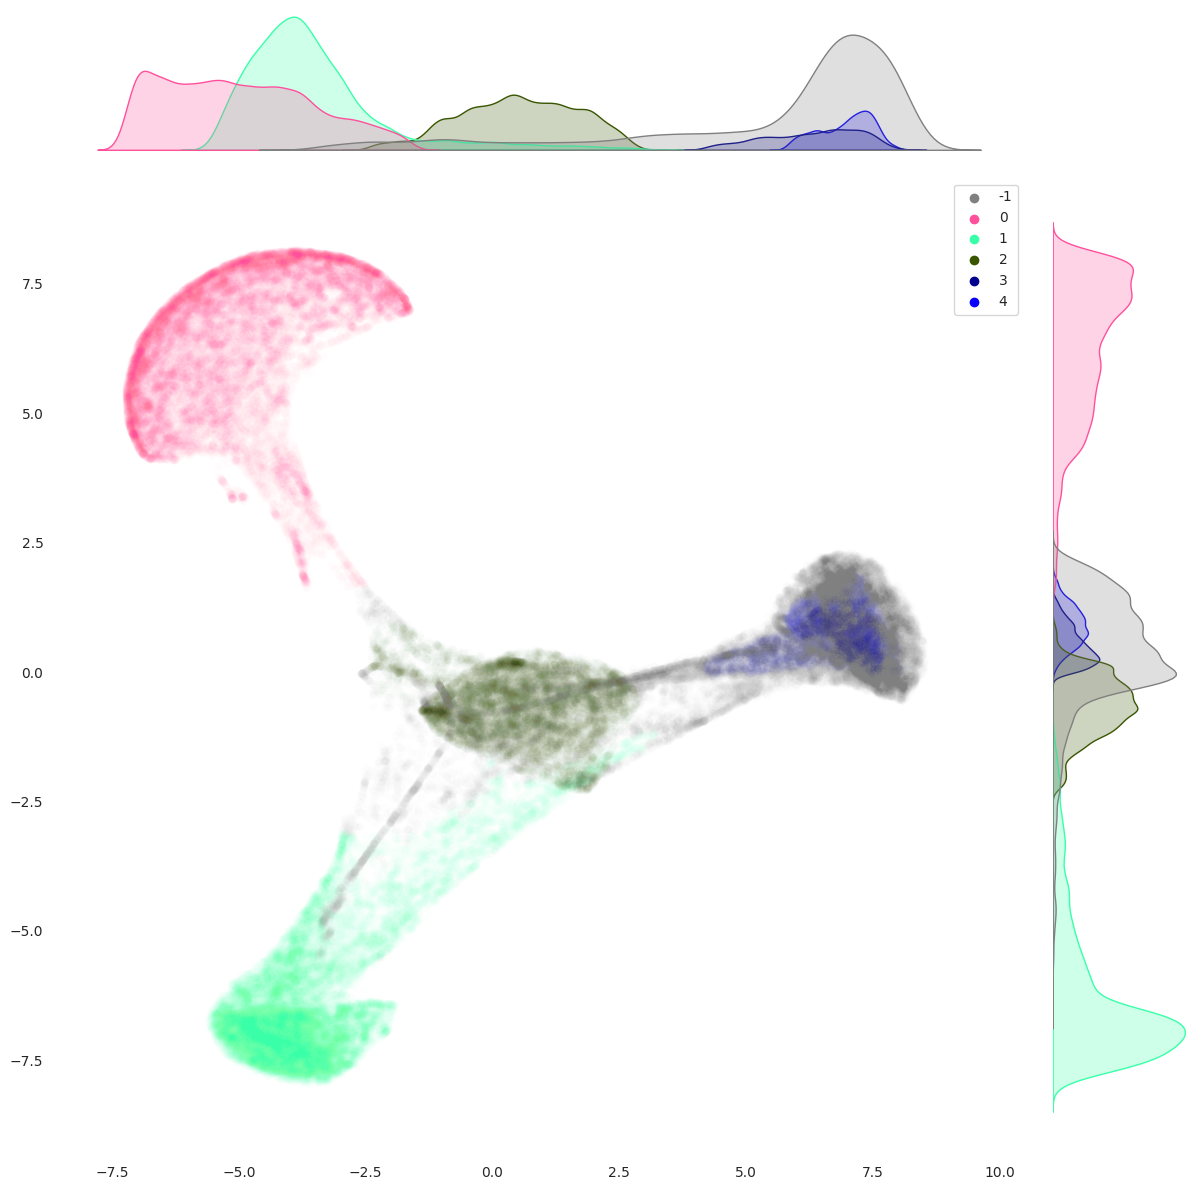

Al, max: 1.00, 98: 0.63, avg: 0.35
As, max: 0.72, 98: 0.01, avg: 0.00
Ca, max: 4.39, 98: 0.70, avg: 0.06
Cl, max: 0.05, 98: 0.04, avg: 0.02
Compton, max: 0.00, 98: 0.00, avg: 0.00
Cr, max: 0.04, 98: 0.03, avg: 0.01
Cu, max: 12.10, 98: 8.21, avg: 1.99
Fe, max: 18.14, 98: 13.61, avg: 7.77
K, max: 0.27, 98: 0.03, avg: 0.00
Mn, max: 10.03, 98: 0.22, avg: 0.03
Mo, max: 15.18, 98: 3.99, avg: 2.29
MoL, max: 0.78, 98: 0.50, avg: 0.22
Ni, max: 0.25, 98: 0.04, avg: 0.01
P, max: 0.06, 98: 0.04, avg: 0.02
S, max: 4.32, 98: 3.30, avg: 1.73
Si, max: 4.49, 98: 2.63, avg: 0.55
Ti, max: 2.78, 98: 0.03, avg: 0.01
V, max: 0.02, 98: 0.01, avg: 0.01
Zn, max: 62.07, 98: 1.81, avg: 0.21
sum, max: 0.00, 98: 0.00, avg: 0.00


In [6]:
classavg = clustering.get_classavg(data, categories, image_directory, force=FORCE_CLUST, overwrite=OVERWRITE)

palette = vis.plot_clusters(categories, classavg, embedding, dims, output_directory=output_directory)

for i in range(len(elements)):
    print(f"{elements[i]}, max: {np.max(data[:,i]):.2f}, 98: {np.quantile(data[:,i],0.98):.2f}, avg: {np.average(data[:,i]):.2f}")

In [44]:
import pandas as pd
from tabulate import tabulate

elements

df = pd.DataFrame(data=classavg, columns=elements)

df
#print(tabulate(df, headers='keys', tablefmt='psql'))

,Al,As,Back,Ca,Cl,Compton,Cr,Cu,Fe,K,...,Mo,MoL,Ni,P,S,Si,Ti,V,Zn,sum
0,0.010151,0.000376,3.311129e-12,0.002014,0.000344,8.619836e-11,0.000050,0.010230,0.023643,0.000026,...,0.304139,0.007000,0.000010,0.000355,0.037829,0.187566,0.000131,0.000026,0.001757,1.427229e-09
1,0.046276,0.000066,1.922300e-12,0.005668,0.002567,3.718758e-10,0.002065,0.683963,0.881556,0.000836,...,0.195785,0.034676,0.001777,0.003103,0.184550,0.012515,0.002080,0.001018,0.018483,1.116713e-08
2,0.035764,0.000574,1.323946e-12,0.013636,0.001704,2.882234e-10,0.001202,0.014772,0.842457,0.000263,...,0.186527,0.015411,0.000095,0.002515,0.273716,0.013121,0.001249,0.000518,0.003420,5.995634e-09
3,0.043403,0.000112,1.236634e-12,0.008568,0.002218,3.224545e-10,0.002174,0.008204,1.162125,0.000505,...,0.202334,0.024826,0.000091,0.002947,0.219361,0.009599,0.001755,0.000999,0.003389,1.086555e-08
4,0.043363,0.000088,1.372432e-12,0.002474,0.002208,3.250135e-10,0.002206,0.004729,1.325241,0.000571,...,0.225068,0.024743,0.000050,0.002978,0.222365,0.011054,0.001784,0.001027,0.002406,1.152028e-08
5,0.042780,0.000125,1.453392e-12,0.007730,0.002190,3.326727e-10,0.002118,0.023876,1.207250,0.000564,...,0.221294,0.024703,0.000306,0.002957,0.220323,0.008894,0.001765,0.000982,0.054312,1.077681e-08


In [8]:
import pandas as pd
from tabulate import tabulate
import xfmreadout.utils as utils

raw_data = data

def calc_classavg(dataset, categories, n_clusters, n_channels):
    """
    calculate summed spectrum for each cluster
    args: 
        dataset, spectrum by px
        catlist, categories by px
    returns:
        specsum, spectrum by category
    
    aware: nclust, number of clusters
    """
    specsum=np.zeros((n_clusters,n_channels))

    if n_clusters != utils.count_categories(categories)[0]:
        raise ValueError("cluster count mismatch")

    for i in range(np.min(categories), np.max(categories)):
        datcat=dataset[categories==i]
        print(f"cluster {i}, count: {datcat.shape[0]}") #DEBUG
        pxincat = datcat.shape[0]   #no. pixels in category i
        specsum[i,:]=(np.sum(datcat,axis=0))/pxincat
    return specsum

n_channels = data.shape[1]
n_clusters, category_list = utils.count_categories(categories)

classavg2=calc_classavg(raw_data, categories, n_clusters, n_channels) 
df = pd.DataFrame(data=classavg, columns=elements)
print(tabulate(df, headers='keys', tablefmt='psql'))




print(n_clusters)
print(category_list)
for i in category_list:
    print(i)
print(len(category_list))



cluster -1, count: 22546
cluster 0, count: 5205
cluster 1, count: 4520
cluster 2, count: 7652
cluster 3, count: 4519
cluster 4, count: 3776
cluster 5, count: 4486
cluster 6, count: 4411
cluster 7, count: 7923
cluster 8, count: 5270
+----+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+-----------+-------------+-------------+-------------+-------------+-----------+
|    |          Al |          As |          Ca |          Cl |     Compton |          Cr |          Cu |          Fe |           K |          Mn |         Mo |         MoL |          Ni |           P |         S |          Si |          Ti |           V |          Zn |       sum |
|----+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+---

In [16]:
n_clusters = len(category_list)

for i in range(n_clusters):
    print(i)

0
1
2
3
4
5
6
7
8
9
10


(80000,)
(80000,)
(80000,)
(80000,)


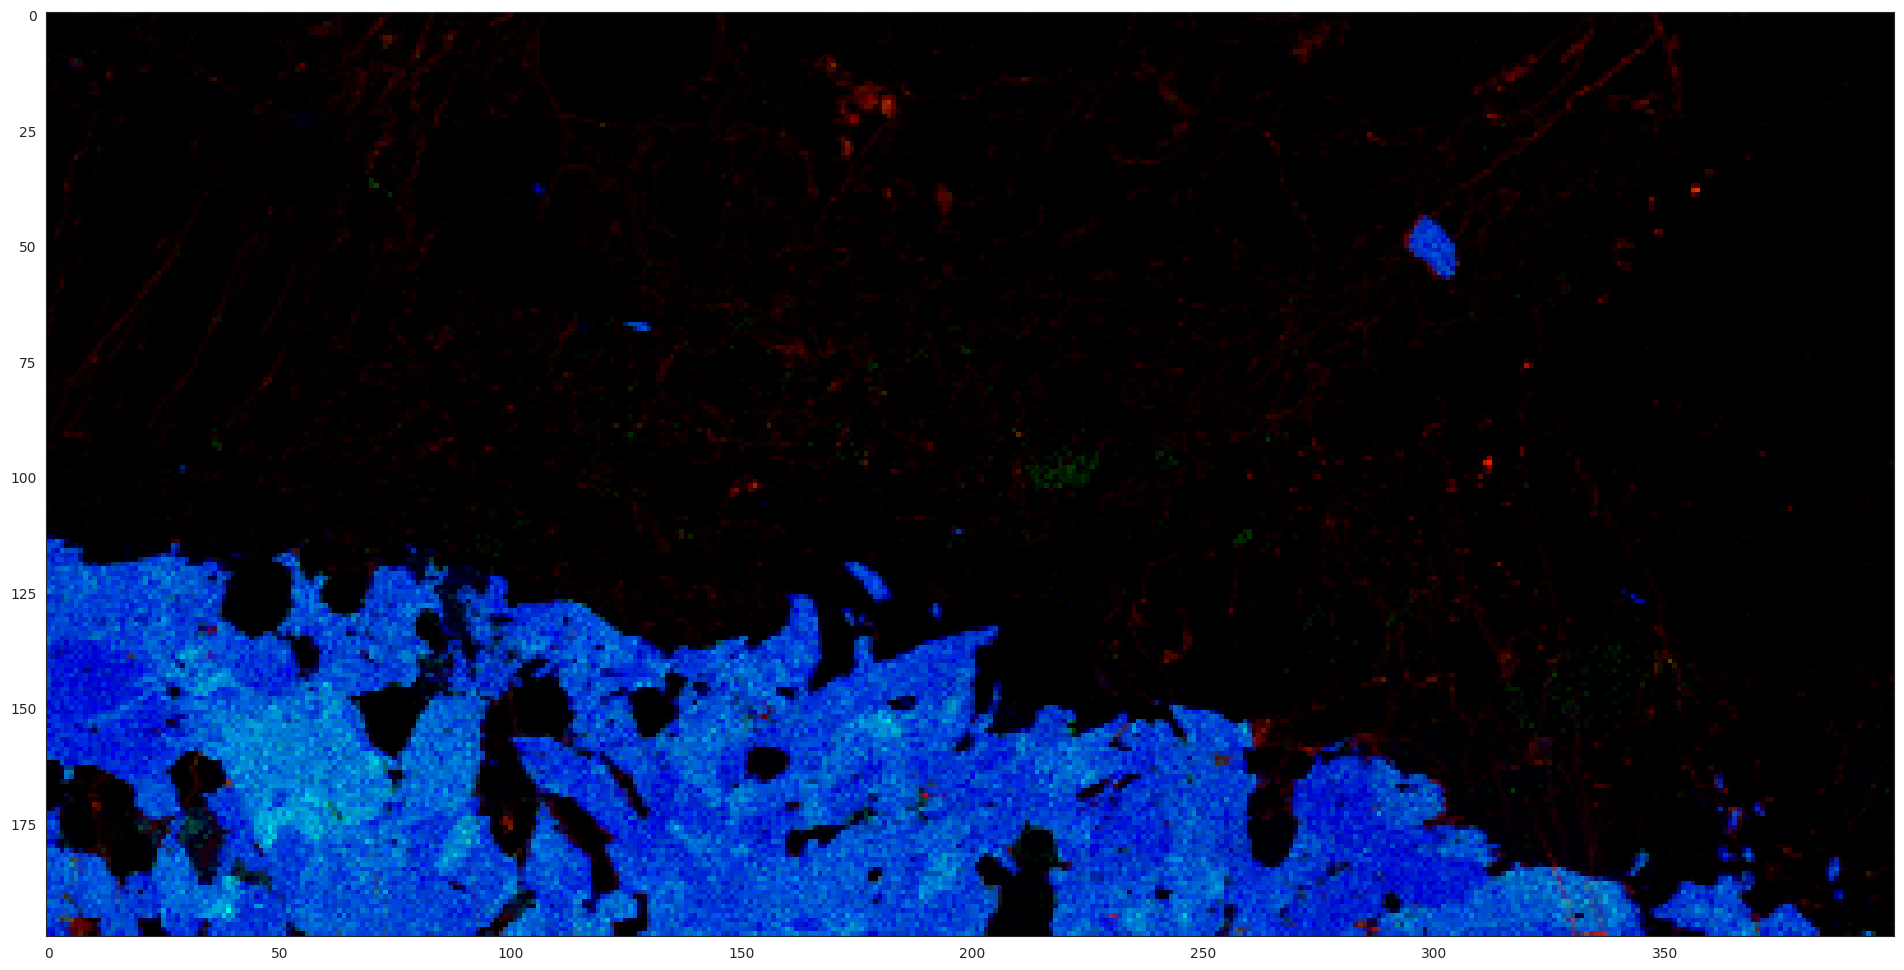

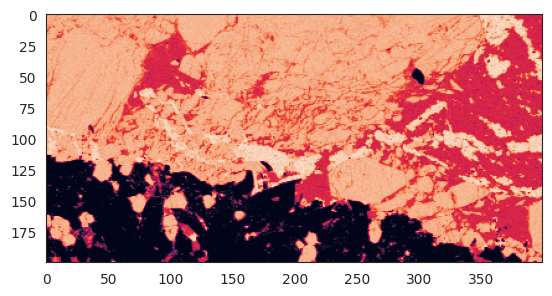

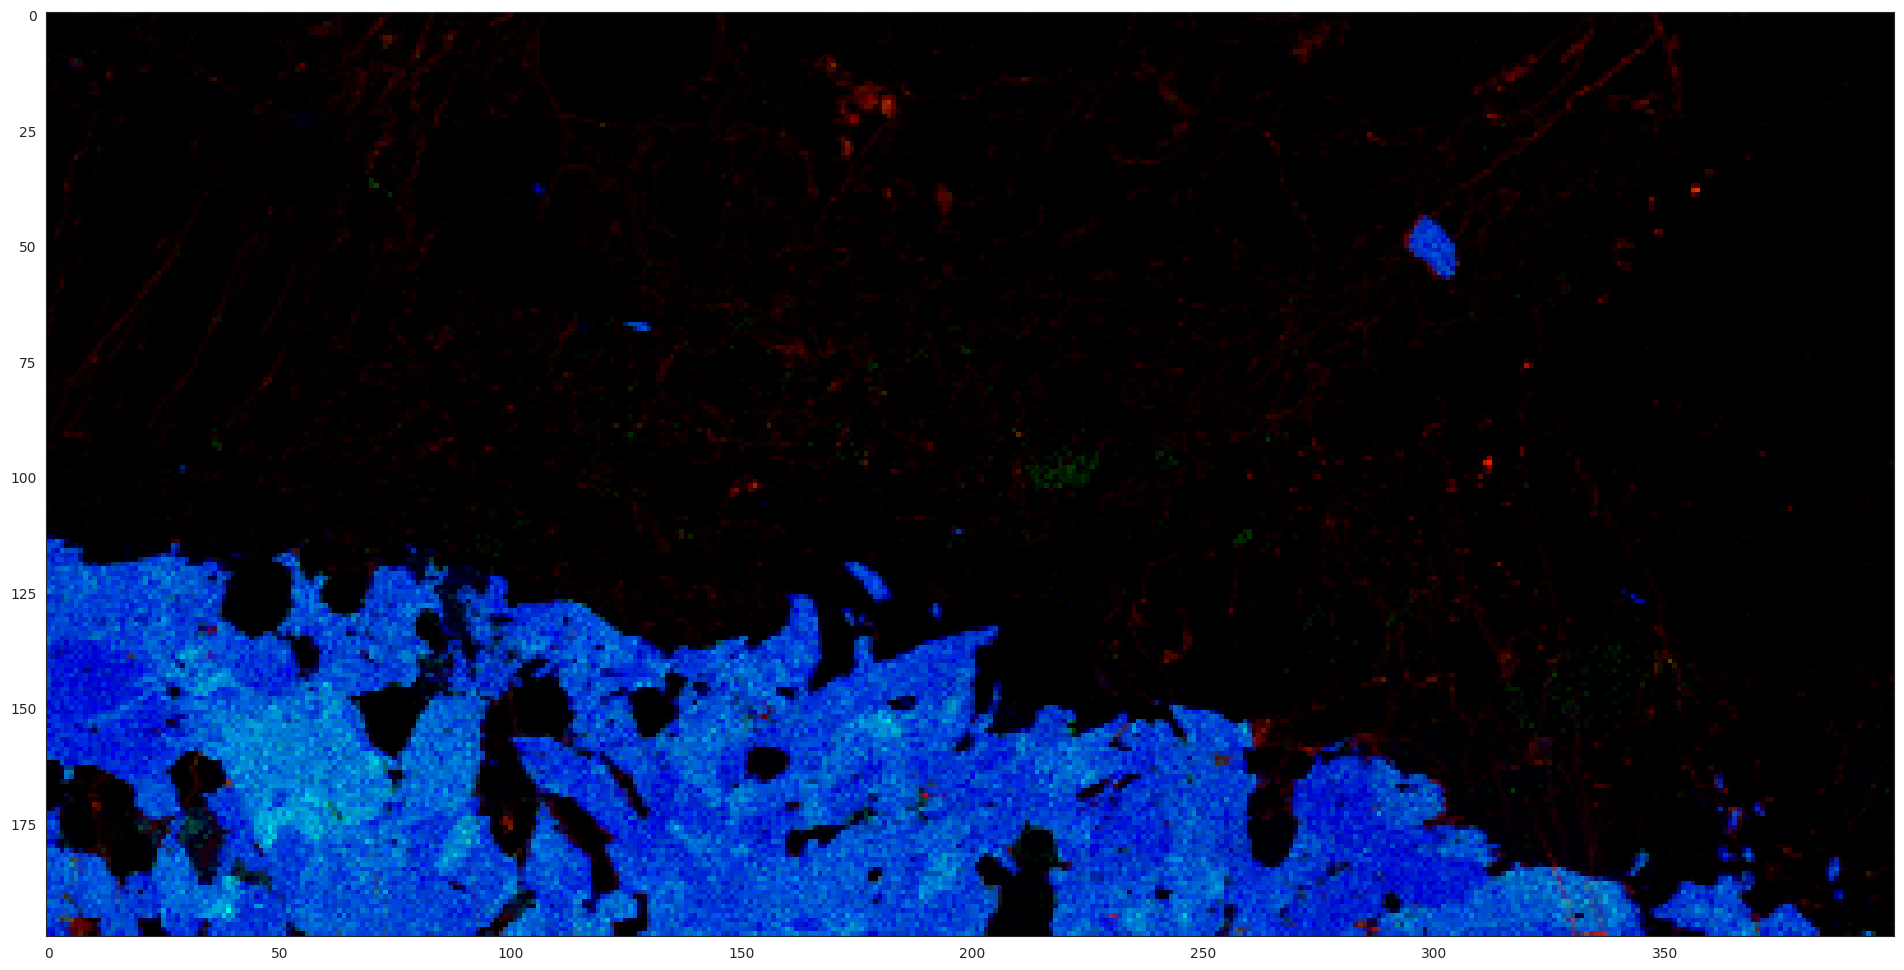

In [36]:
import xfmreadout.utils as utils
import xfmreadout.visualisations as vis

r = utils.get_map(data, dims, elements, 'Fe')
plt.imshow(r)

#vis.tricolour_enames('Fe','Cu','Si', data, dims, elements)
vis.tricolour_enames('Ca','As','Si', data, dims, elements)

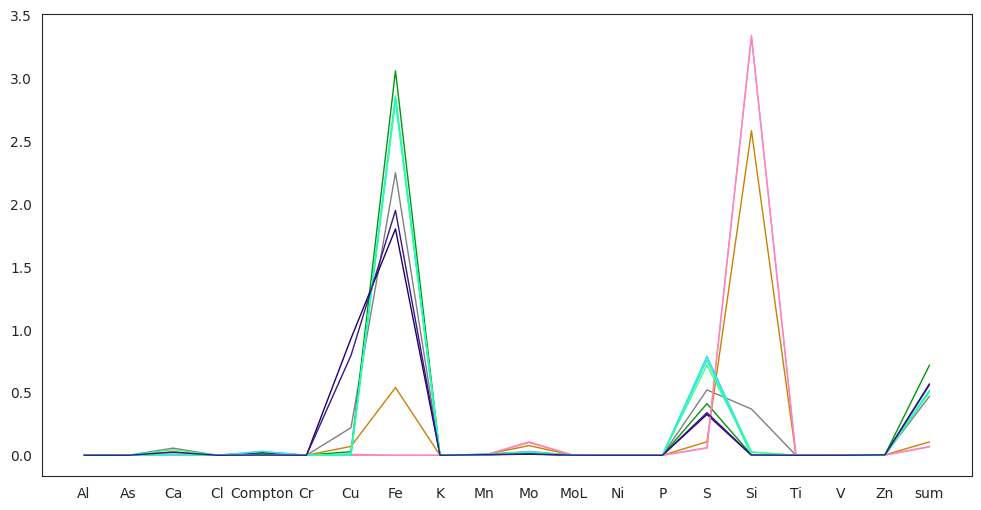

In [40]:
from matplotlib import colors

vis.category_avgs(categories, elements, classavg, palette=palette)